<h1><center>House Price Predictor in King County</center></h1>

### Questions

1. How much should I expect to get for a 2400 sq ft. house according to your best model? what about a 10,000 sq ft. house? What about a 4-bedroom house? Be creative with this question. Describe how you might address predicting the price of a 3000 sq ft. house in a particular zip code.
2. How would you improve the prediction? What would you improve about the data or model to get a 'better' result?
3. Is there anything about the data that would indicate that a linear model is appropriate or not?
4. Given a large team and years of time, what sorts of methods can you think of to improve the result.

### Description of the data fields
1.	id - identificator of a single house sold in the Seattle area
2.	date - date of sale
3.	price - house's selling price
4.	bedrooms - bedrooms number
5.	bathrooms - bathrooms number
6.	sqft_living - living area, square feet
7.	sqft_lot - total house area, square feet
8.	floors - floors number
9.	waterfront - waterfront view, yes (1) / no (0)
10.	view - view # 0-4
11.	condition - condition level 1-5
12.	grade - grade rate 1-13
13.	sqft_above - square footage of house apart from basement
14.	sqft_basement  - square footage of the basement
15.	yr_built - year in which the property was constructed
16.	yr_renovated - year in which the property was renovated
17.	zipcode - US postal code
18.	lat - latitude coordinate
19.	long - longitude coordinate
20.	sqft_living15 - living room area in 2015
21.	sqft_lot15 - lotSize area in 2015

In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import r2_score

### 1. Importing the data
##### https://www.kaggle.com/harlfoxem/housesalesprediction

In [26]:
df = pd.read_csv('kc_house_data.csv', header=0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [28]:
print(df.shape)

(21613, 21)


### 2. Data Cleaning

In [29]:
df = df.drop(["id", "date"], axis=1)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [30]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 3. Data Exploration

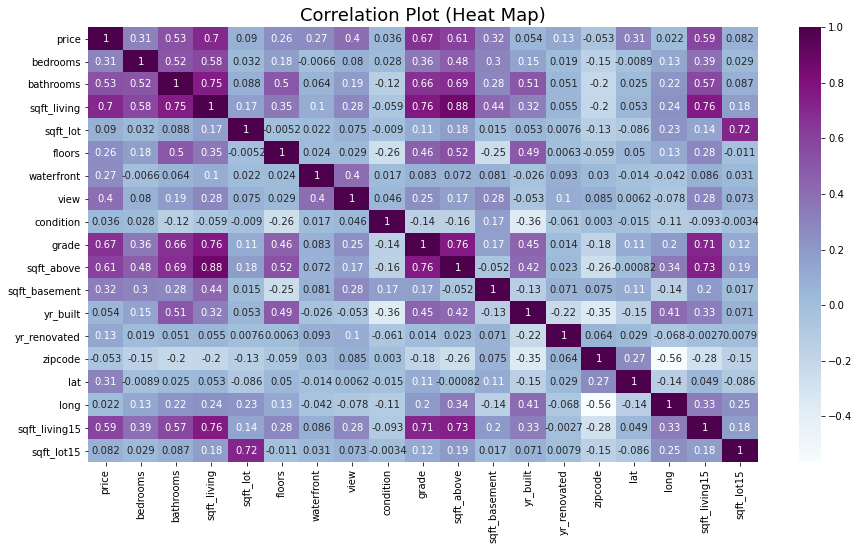

In [31]:
correlation_matrix = df.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap="BuPu")
plt.title('Correlation Plot (Heat Map)', size=18)
plt.show()

In [32]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<ipython-input-33-822b462e540c>:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  viz.hist(ax=ax)


array([[<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

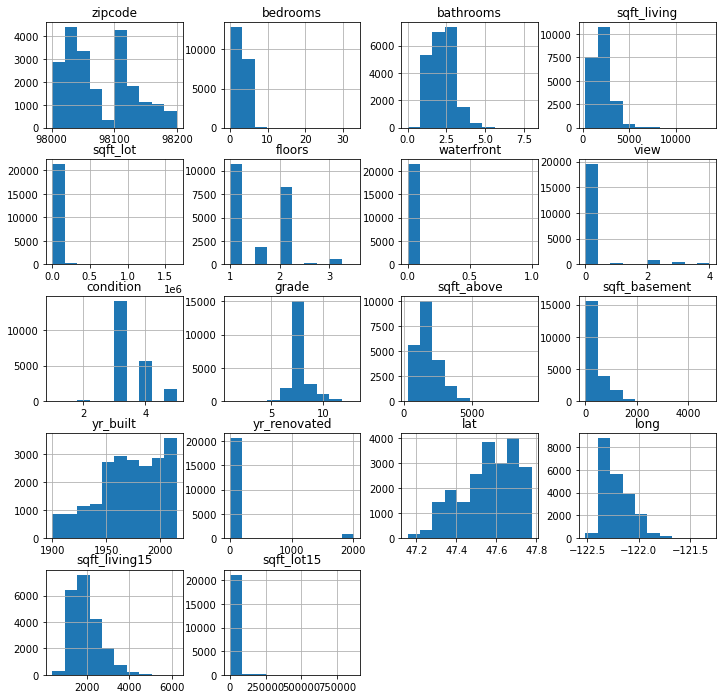

In [33]:
features = [ "zipcode", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront",
            "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", 
            "yr_renovated", "lat", "long", "sqft_living15", "sqft_lot15",]

viz = df[features] 
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
viz.hist(ax=ax)

### 4. Statistics Tables

We use all features, except for id, date.

In [34]:
features = ["zipcode", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront",
            "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", 
            "yr_renovated", "lat", "long", "sqft_living15", "sqft_lot15"]

X = df[features]
#Add X Intercept
X = sm.add_constant(X)
Y = df['price']
model_rawdata = sm.OLS(Y,X).fit()
model_rawdata.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:53:56   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.69e+06   2.93e+06      2.282      0.022    9.44e+05    1.24e+07
zipcode        -582.4199     32.986    -17.657      0.000    -647.074    -517.765
bedrooms      -3.577e+04   1891.843    -18.906      0.000   -3.95e+04   -3.21e+04
bathrooms      4.114e+04   3253.678     12.645      0.000    3.48e+04    4.75e+04
sqft_living     110.4435      2.270     48.662      0.000     105.995     114.892
sqft_lot          0.1286      0.048      2.683      0.007       0.035       0.223
floors         6689.5501   3595.859      1.860      0.063    -358.599    1.37e+04
waterfront      5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
view           5.287e+04   2140.055     24.705      0.000    4.87e+04    5.71e+04
condition      2.639e+04   2351.461     11.221      0.000    2.18e+04     3.1e+04
grade          9.589e+04   2152.789     44.542      0.000    9.17e+04       1e+05
sqft_above       70.7846      2.253     31.411      0.000      66.368      75.202
sqft_basement    39.6570      2.646     14.985      0.000      34.470      44.844
yr_built      -2620.2232     72.659    -36.062      0.000   -2762.640   -2477.806
yr_renovated     19.8126      3.656      5.420      0.000      12.647      26.978
lat            6.027e+05   1.07e+04     56.149      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
sqft_living15    21.6814      3.448      6.289      0.000      14.924      28.439
sqft_lot15       -0.3826      0.073     -5.222      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     4.60e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Lets take a look at the P-value column in the summary table. High value indicates, that we don't need corresponding coefficient (test the null hypothesis of this coefficient to be equal to 0). In our case sqft_lot has P value = 0.007 and for floors P=0.063. Lets redo the regression without sqft_lot and floors.

In [35]:
features = ["zipcode", "bedrooms", "bathrooms", "sqft_living", "waterfront",
            "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", 
            "yr_renovated", "lat", "long", "sqft_living15", "sqft_lot15"]

X = df[features]
#Add X Intercept
X = sm.add_constant(X)
Y = df['price']
model_rawdata = sm.OLS(Y,X).fit()
model_rawdata.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3353.
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:54:10   Log-Likelihood:            -2.9461e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21597   BIC:                         5.894e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.11e+06   2.88e+06      2.119      0.034    4.57e+05    1.18e+07
zipcode        -576.7470     32.848    -17.558      0.000    -641.132    -512.362
bedrooms      -3.599e+04   1890.875    -19.035      0.000   -3.97e+04   -3.23e+04
bathrooms      4.275e+04   3142.374     13.603      0.000    3.66e+04    4.89e+04
sqft_living     110.2711      2.253     48.937      0.000     105.854     114.688
waterfront     5.823e+05   1.74e+04     33.540      0.000    5.48e+05    6.16e+05
view           5.316e+04   2138.663     24.854      0.000     4.9e+04    5.73e+04
condition      2.603e+04   2347.791     11.086      0.000    2.14e+04    3.06e+04
grade          9.635e+04   2144.492     44.927      0.000    9.21e+04    1.01e+05
sqft_above       72.6172      2.089     34.757      0.000      68.522      76.712
sqft_basement    37.6516      2.412     15.611      0.000      32.924      42.379
yr_built      -2600.1054     70.842    -36.703      0.000   -2738.962   -2461.249
yr_renovated     20.0284      3.651      5.486      0.000      12.873      27.184
lat            6.034e+05   1.07e+04     56.428      0.000    5.82e+05    6.24e+05
long          -2.144e+05   1.31e+04    -16.421      0.000    -2.4e+05   -1.89e+05
sqft_living15    20.3926      3.420      5.963      0.000      13.689      27.096
sqft_lot15       -0.2539      0.053     -4.789      0.000      -0.358      -0.150
==============================================================================
Omnibus:                    18311.180   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1837449.635
Skew:                           3.546   Prob(JB):                         0.00
Kurtosis:                      47.610   Cond. No.                     4.37e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R^2 did not change compared to previous iteration, so we made the right chose on removing two insignificant features.

### 5. Multiple Linear Regression

In [41]:
features = ["zipcode", "bedrooms", "bathrooms", "sqft_living", "waterfront",
            "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", 
            "yr_renovated", "lat", "long", "sqft_living15", "sqft_lot15"]

#splitting the dataset into train (80%) and test (20%) sets
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

regr = linear_model.LinearRegression()
x = np.asanyarray(train[features])
y = np.asanyarray(train[['price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[-5.99524307e+02 -3.61939026e+04  4.44300642e+04  1.13616469e+02
   5.78864753e+05  5.11721074e+04  2.52743147e+04  9.36027839e+04
   7.79107909e+01  3.57056786e+01 -2.67167310e+03  2.34051554e+01
   5.99107210e+05 -2.28828349e+05  1.76674964e+01 -2.88673402e-01]]
Intercept:  [6936275.11367785]


In [42]:
#calculating the predicted y values (y_hat) by the model
y_hat= regr.predict(test[features])
x = np.asanyarray(test[features])
y = np.asanyarray(test[['price']])

print('R2: {:.2f}'.format(r2_score(y, y_hat)))

R2: 0.68


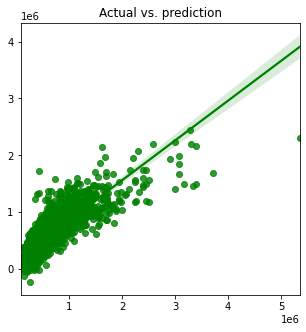

In [43]:
ax, fig =plt.subplots(1,1,figsize=(5,5))
ax = sns.regplot(x=y, y=y_hat, color="g")
ax.set_title('Actual vs. prediction')
plt.show()

### 6. Questions

1. How much should I expect to get for a 2400 sq ft. house according to your best model? what about a 10,000 sq ft. house? What about a 4-bedroom house? Be creative with this question. Describe how you might address predicting the price of a 3000 sq ft. house in a particular zip code.

We can calculate price using the coeficients and constant (intercept), for example:
    Price = sqft * coefficent1 + floor * coefficient2 + constant.

In [39]:
#"zipcode", "bedrooms", "bathrooms", "sqft_living", "waterfront",
#"view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", 
#"yr_renovated", "lat", "long", "sqft_living15", "sqft_lot15"

#How much should I expect to get for a 2400 sq ft. house according to your best model? 10000 sq f? 4-bedroom?
print(regr.predict(np.array([[0, 0, 0, 2400, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])))
print(regr.predict(np.array([[0, 0, 0, 10000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])))
print(regr.predict(np.array([[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])))


[[7171635.90610566]]
[[7979322.17165092]]
[[6777745.92446528]]


For prediction using particular zipcode we need to trasfom categorical zipcode feature into numerical value (for example, using one hot encoding).

2. How would you improve the prediction? What would you improve about the data or model to get a 'better' result?

- One hot encoding for Zipcode. 
- Using another algorithm and compare their accuracy.
- Feature selection: check for multicollinearity. Variance inflation factor(VIF) detects multicollinearity in regression analysis, i.e. we can exclude some features (independent variables) with high correlation between them.

3. Is there anything about the data that would indicate that a linear model is appropriate or not?

- Distrubution of features: long and lat have complicated distributions with multiple peaks. We could not use it with linear regression.
- P-value of features > 0.05 (I excluded sqft_lot and floors that are not statisticaly significant).
- Evaluation of the model performance: check for Mean Absolute Errore, Mean Sq Error, R^2. 

4. Given a large team and years of time, what sorts of methods can you think of to improve the result.

- Different feature selections (combination of features).
- Choosing the right error or score metric.
- Using other models or combination of models (averaging models).
- Looking for more data.
- Checking / removing outliers.